                     PJME_MW
Datetime                    
2002-12-31 01:00:00  26498.0
2002-12-31 02:00:00  25147.0
2002-12-31 03:00:00  24574.0
2002-12-31 04:00:00  24393.0
2002-12-31 05:00:00  24860.0
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 145366 entries, 2002-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   PJME_MW  145366 non-null  float64
dtypes: float64(1)
memory usage: 2.2 MB
None


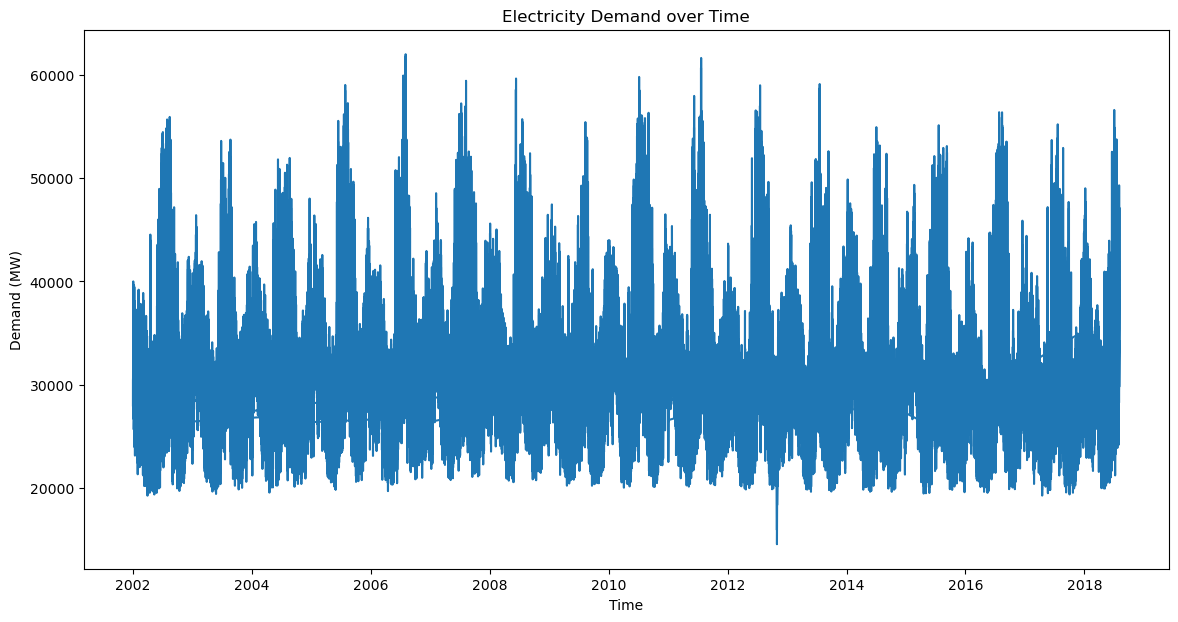

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('C:\\Users\\admin\\OneDrive\\Desktop\\ML projects\\Energy Cons Time Series\\PJME_hourly.csv', index_col='Datetime', parse_dates=True)

# Inspect the data
print(data.head())
print(data.info())

# Plot the data to observe trends and seasonality
plt.figure(figsize=(14, 7))
plt.plot(data['PJME_MW'])
plt.title('Electricity Demand over Time')
plt.xlabel('Time')
plt.ylabel('Demand (MW)')
plt.show()


In [9]:
# Check for missing values
print(data.isnull().sum())

# Handle missing values by forward filling
data.fillna(method='ffill', inplace=True)

# Resample the data to daily mean if needed
data_daily = data.resample('D').mean()

# Create time-based features
data_daily['hour'] = data_daily.index.hour
data_daily['day'] = data_daily.index.day
data_daily['month'] = data_daily.index.month
data_daily['weekday'] = data_daily.index.weekday


PJME_MW    0
dtype: int64


In [10]:
# Create lag features
for lag in range(1, 25):
    data_daily[f'lag_{lag}'] = data_daily['PJME_MW'].shift(lag)

# Create rolling statistics
data_daily['rolling_mean_24'] = data_daily['PJME_MW'].rolling(window=24).mean()
data_daily['rolling_std_24'] = data_daily['PJME_MW'].rolling(window=24).std()

# Drop NaN values created by lag and rolling calculations
data_daily.dropna(inplace=True)


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.tree  import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and testing sets
X = data_daily.drop('PJME_MW', axis=1)
y = data_daily['PJME_MW']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train a Random Forest Regressor
model = DecisionTreeRegressor( )
model.fit(X_train, y_train)



DecisionTreeRegressor()

r2_score: 0.6739421960572154
RMSE: 2736.7309965193353


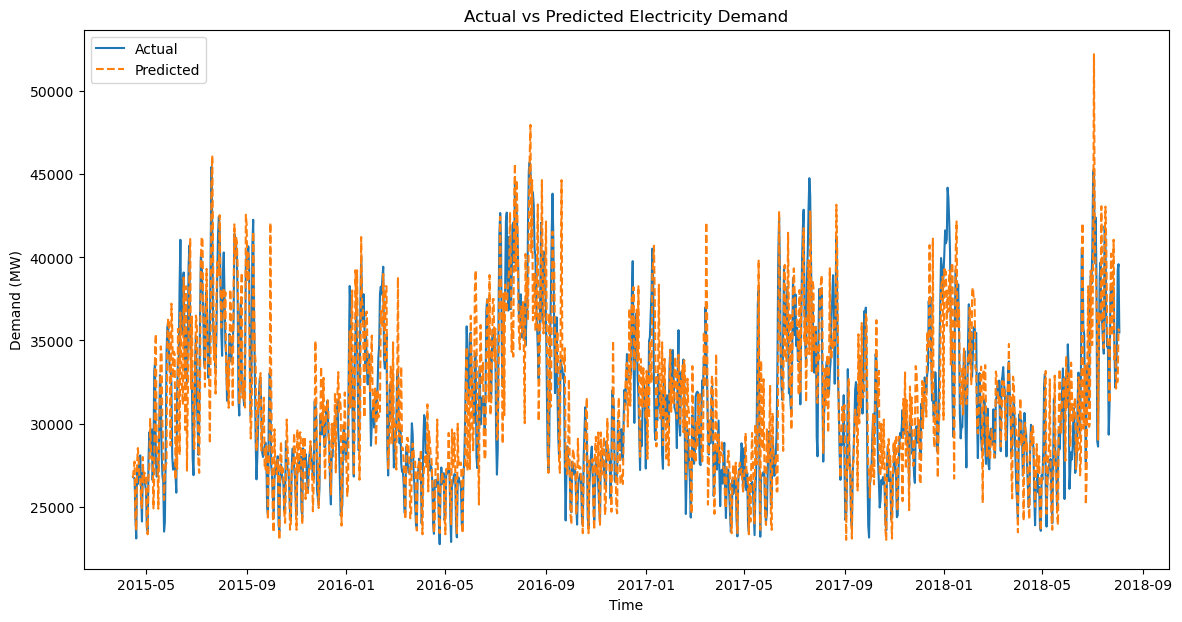

In [12]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
accuracy = r2_score(y_test, y_pred)
print(f'r2_score: {accuracy}')
print(f'RMSE: {rmse}')


# Plot actual vs predicted values
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted', linestyle='--')
plt.title('Actual vs Predicted Electricity Demand')
plt.xlabel('Time')
plt.ylabel('Demand (MW)')
plt.legend()
plt.show()


[0]	validation_0-rmse:32330.23051	validation_1-rmse:31160.98858


C:\Users\admin\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [14:23:08] WARNING: C:\b\abs_0fh_d4x2ng\croot\xgboost-split_1713973188995\work\cpp_src\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[100]	validation_0-rmse:12017.23782	validation_1-rmse:11401.96129
[200]	validation_0-rmse:4748.81250	validation_1-rmse:4475.79706
[300]	validation_0-rmse:2414.68145	validation_1-rmse:2416.23298
[400]	validation_0-rmse:1841.08887	validation_1-rmse:2015.32466
[500]	validation_0-rmse:1716.37548	validation_1-rmse:1962.88849
[600]	validation_0-rmse:1671.46815	validation_1-rmse:1950.09885
[700]	validation_0-rmse:1639.23621	validation_1-rmse:1937.85664
[800]	validation_0-rmse:1611.92961	validation_1-rmse:1927.60291
[900]	validation_0-rmse:1586.69028	validation_1-rmse:1919.96538
[999]	validation_0-rmse:1564.83701	validation_1-rmse:1915.62719
r2_score: 0.8402457654279771
RMSE: 1915.6272260422875


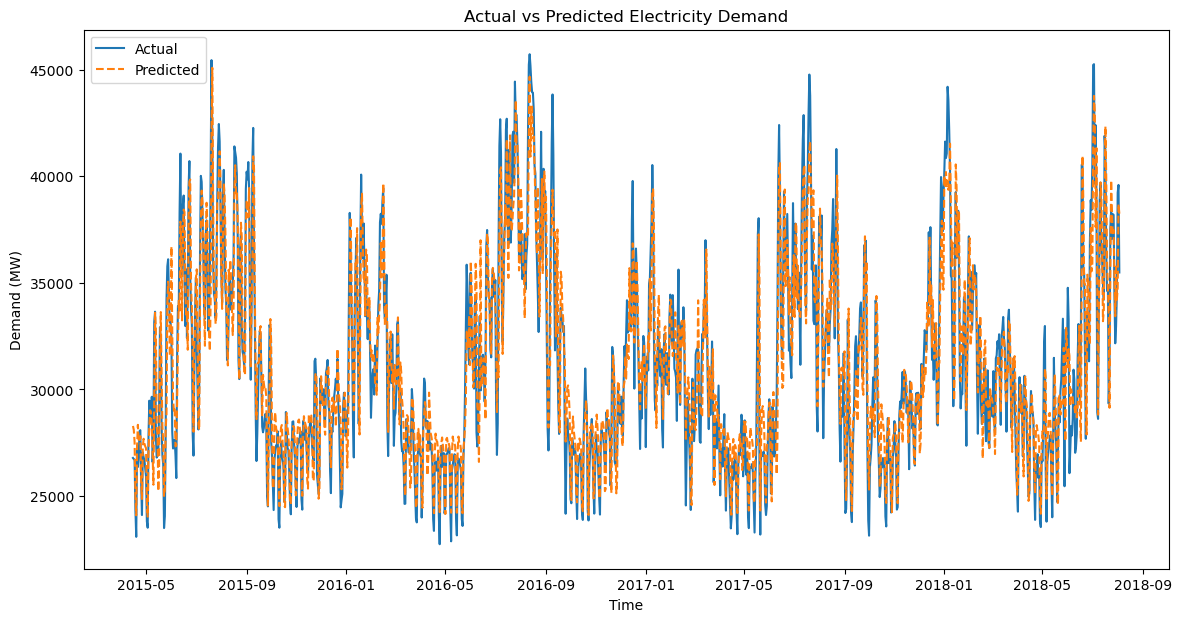

In [13]:
# Importing XGBoost library
import xgboost as xgb 
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

# Make predictions
y_pred = reg.predict(X_test)        

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
accuracy = r2_score(y_test, y_pred)
print(f'r2_score: {accuracy}')
print(f'RMSE: {rmse}')

# Plot actual vs predicted values
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted', linestyle='--')
plt.title('Actual vs Predicted Electricity Demand')
plt.xlabel('Time')
plt.ylabel('Demand (MW)')
plt.legend()
plt.show()

